In [9]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/Data_Extraction.csv'
data = pd.read_csv(data_url)

print(data.head())

  Paper_Name  Paper_ID  Exp_ID  Treatment_ID  Measure_ID  Exp_ID_Cleaned  \
0   Lai_2020         1       1             1           1             1.1   
1   Lai_2020         1       1             2           1             1.1   
2   Lai_2020         1       1             3           1             1.1   
3   Lai_2020         1       1             4           1             1.1   
4   Lai_2020         1       1             5           1             1.1   

     ES_ID                                              Title  \
0  1.1.1.1  "Why is 'Chicago' Deceptive?" Towards Building...   
1  1.1.2.1  "Why is 'Chicago' Deceptive?" Towards Building...   
2  1.1.3.1  "Why is 'Chicago' Deceptive?" Towards Building...   
3  1.1.4.1  "Why is 'Chicago' Deceptive?" Towards Building...   
4  1.1.5.1  "Why is 'Chicago' Deceptive?" Towards Building...   

                               Authors  Year  ... Avg_Perf_Worse_Adj Synergy  \
0  Lai, Vivian; Liu, Han; Tan, Chenhao  2020  ...              0.546    

In [7]:

print(data.info())

print(data.describe())

print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Paper_Name               370 non-null    object 
 1   Paper_ID                 370 non-null    int64  
 2   Exp_ID                   370 non-null    int64  
 3   Treatment_ID             370 non-null    int64  
 4   Measure_ID               370 non-null    int64  
 5   Exp_ID_Cleaned           370 non-null    float64
 6   ES_ID                    370 non-null    object 
 7   Title                    370 non-null    object 
 8   Authors                  370 non-null    object 
 9   Year                     370 non-null    int64  
 10  Venue                    365 non-null    object 
 11  Exp_Design               370 non-null    object 
 12  Comp_Type                370 non-null    object 
 13  Task_Desc                362 non-null    object 
 14  Task_Data                3

# Summary Statistics

This code calculates summary statistics (mean, median, standard deviation, skewness, kurtosis) for annual maxima values across stations.

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

data_url = 'https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/Data_Extraction.csv'
df = pd.read_csv(data_url)

print("Columns in the DataFrame:")
print(df.columns.tolist())

measurement_columns = ['Avg_Perf_Human', 'Avg_Perf_AI', 'Avg_Perf_HumanAI']

existing_columns = [col for col in measurement_columns if col in df.columns]

if len(existing_columns) != len(measurement_columns):
    print(f"Warning: Some columns are missing. Using only: {existing_columns}")
    measurement_columns = existing_columns

summary_stats = {}
for col in measurement_columns:
    values = df[col].dropna()
    summary_stats[col] = {
        'mean': np.mean(values),
        'median': np.median(values),
        'std_dev': np.std(values),
        'skewness': skew(values),
        'kurtosis': kurtosis(values)
    }

for metric, stats in summary_stats.items():
    print(f"\n{metric}:")
    print(f"Mean: {stats['mean']:.4f}")
    print(f"Median: {stats['median']:.4f}")
    print(f"Std Dev: {stats['std_dev']:.4f}")
    print(f"Skewness: {stats['skewness']:.4f}")
    print(f"Kurtosis: {stats['kurtosis']:.4f}")

paper_stats = df.groupby('Paper_Name')[measurement_columns].agg(['mean', 'median', 'std', skew, kurtosis])

print("\nSummary Statistics by Paper:")
print(paper_stats)


Columns in the DataFrame:
['Paper_Name', 'Paper_ID', 'Exp_ID', 'Treatment_ID', 'Measure_ID', 'Exp_ID_Cleaned', 'ES_ID', 'Title', 'Authors', 'Year', 'Venue', 'Exp_Design', 'Comp_Type', 'Task_Desc', 'Task_Data', 'Task_Data_Cleaned', 'Task_Data_IsCategoric', 'Task_Data_IsCode', 'Task_Data_IsImage', 'Task_Data_IsNumeric', 'Task_Data_IsText', 'Task_Data_IsVideo', 'Task_Output', 'Task_Output_Cleaned', 'Task_Type', 'AI_Type', 'AI_Data_In', 'AI_Data_Out', 'AI_Type_Cleaned', 'Final_Decision', 'Division_Labor', 'Condition_Name', 'AI_Expl_Incl', 'AI_Conf_Incl', 'AI_Expl_Type', 'Perf_Metric', 'Perf_Metric_Cleaned', 'Perf_Dir', 'N_Exp', 'N_Human', 'N_HumanAI', 'Participant_Type', 'Participant_Type_2', 'Participant_Source', 'Participant_Expert', 'Participant_Crowdworker', 'Avg_Perf_Human', 'Avg_Perf_AI', 'Avg_Perf_HumanAI', 'Avg_Perf_Human_Adj', 'Avg_Perf_AI_Adj', 'Avg_Perf_HumanAI_Adj', 'Baseline', 'Avg_Perf_Baseline_Adj', 'Avg_Perf_Worse_Adj', 'Synergy', 'Sd_Perf_Human', 'Sd_Perf_AI', 'Sd_Perf_Hum

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/generic.py:324: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)



Summary Statistics by Paper:
               Avg_Perf_Human                                                 \
                         mean     median         std          skew  kurtosis   
Paper_Name                                                                     
Alufaisan_2021       0.624500    0.62450    0.014203 -1.359856e-14 -2.000000   
Bai_2020             0.845700    0.84570    0.030000  0.000000e+00 -1.500000   
Bansal_2021          0.758033    0.81570    0.132964 -5.865268e-01 -1.500000   
Baudel_2021          0.723000    0.72300    0.000000           NaN       NaN   
Bo_2021              0.859500    0.83300    0.071091  1.547904e+00  0.762706   
...                       ...        ...         ...           ...       ...   
Winkel_2021          0.830000    0.83000         NaN           NaN       NaN   
Yang_2020            0.749200    0.74920    0.107573  1.717383e-15 -2.000000   
Zhang_2022           0.681125    0.67910    0.017517  5.138481e-01 -0.972832   
Zhao_2022 

The purpose of this code is to create a histogram matrix that can be used to visualize the distribution of all numerical variables in the dataset

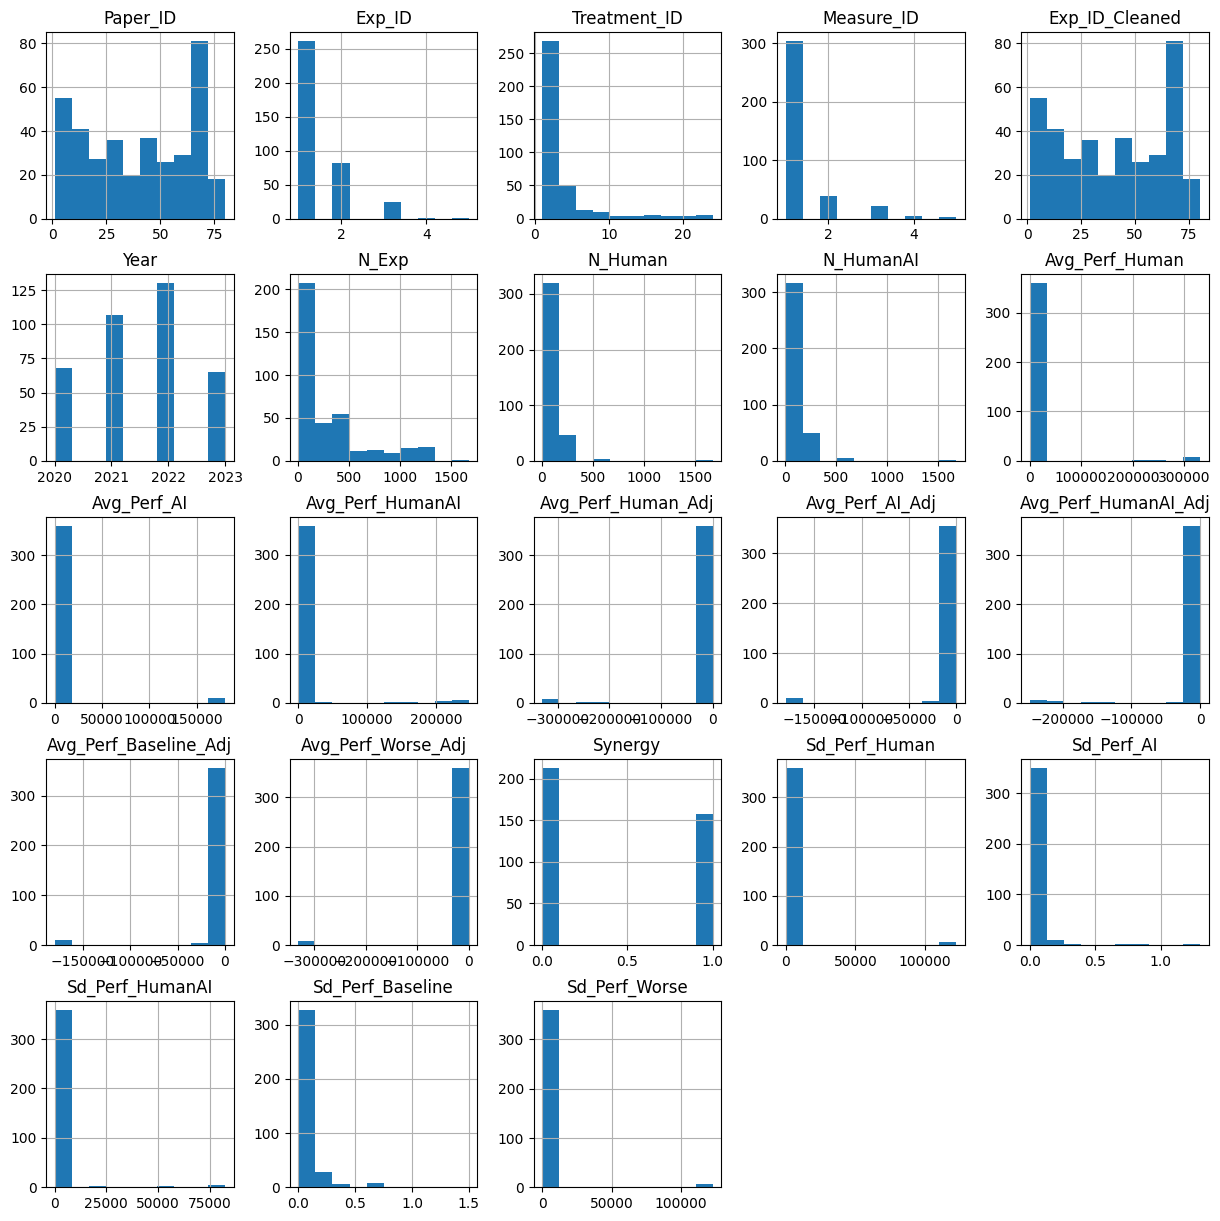

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(15, 15))
plt.show()

## 1. Data Generation and Visualization:

First, we introduce the data generation process for each type of analysis and visualize the generated data.

  Paper_Name  Paper_ID  Exp_ID  Treatment_ID  Measure_ID  Exp_ID_Cleaned  \
0   Lai_2020         1       1             1           1             1.1   
1   Lai_2020         1       1             2           1             1.1   
2   Lai_2020         1       1             3           1             1.1   
3   Lai_2020         1       1             4           1             1.1   
4   Lai_2020         1       1             5           1             1.1   

     ES_ID                                              Title  \
0  1.1.1.1  "Why is 'Chicago' Deceptive?" Towards Building...   
1  1.1.2.1  "Why is 'Chicago' Deceptive?" Towards Building...   
2  1.1.3.1  "Why is 'Chicago' Deceptive?" Towards Building...   
3  1.1.4.1  "Why is 'Chicago' Deceptive?" Towards Building...   
4  1.1.5.1  "Why is 'Chicago' Deceptive?" Towards Building...   

                               Authors  Year  ... Avg_Perf_Worse_Adj Synergy  \
0  Lai, Vivian; Liu, Han; Tan, Chenhao  2020  ...              0.546    

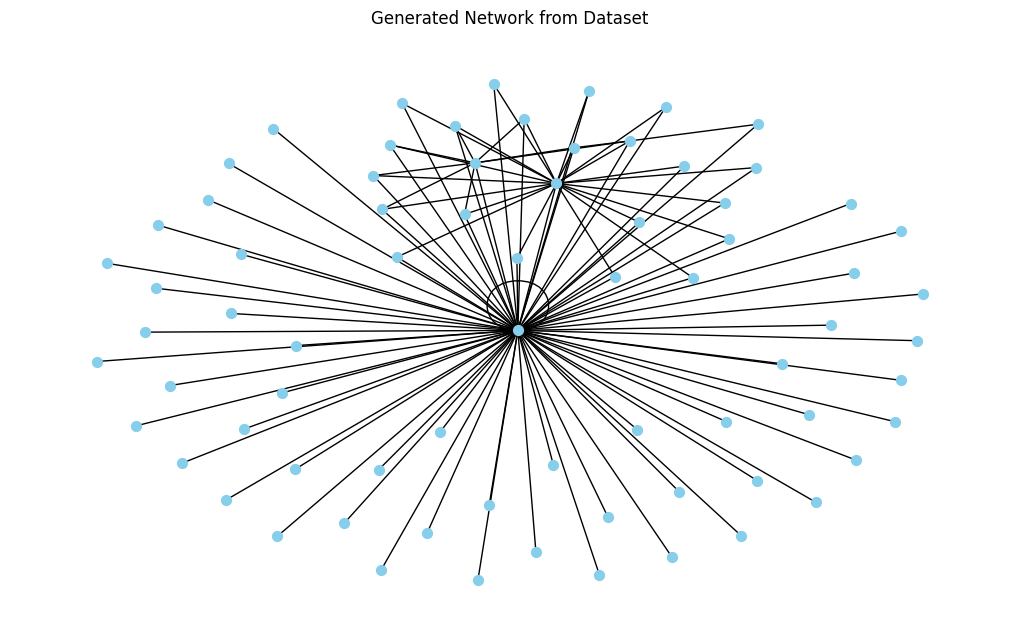

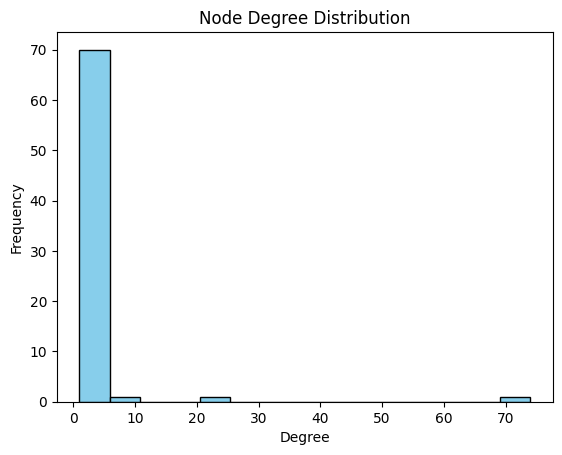

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

url = 'https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/Data_Extraction.csv'
df = pd.read_csv(url)

print(df.head())

graph_df = df[['Paper_ID', 'Exp_ID']].drop_duplicates()

G = nx.from_pandas_edgelist(graph_df, source='Paper_ID', target='Exp_ID')

plt.figure(figsize=(10, 6))
nx.draw(G, node_size=50, node_color='skyblue', with_labels=False)
plt.title("Generated Network from Dataset")
plt.show()

node_degrees = [deg for _, deg in G.degree()]
plt.hist(node_degrees, bins=15, color='skyblue', edgecolor='black')
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


##2. Prediction with Machine Learning

##Data Generation Process

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/Data_Extraction.csv'
df = pd.read_csv(url)

np.random.seed(42)
n_samples = len(df)

X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 1, n_samples)

prediction_df = pd.DataFrame({
    'Feature_1': X1,
    'Feature_2': X2,
    'Feature_3': X3,
    'Outcome': y
})

print(prediction_df.head())


   Feature_1  Feature_2  Feature_3   Outcome
0   0.496714   0.024510  -1.840874  3.189355
1  -0.138264   0.497998  -1.279577  2.078214
2   0.647689   1.451144  -0.624819  6.340239
3   1.523030   0.959271   0.026091  6.957222
4  -0.234153   2.153182   0.517659  3.236665


##Data Visualization



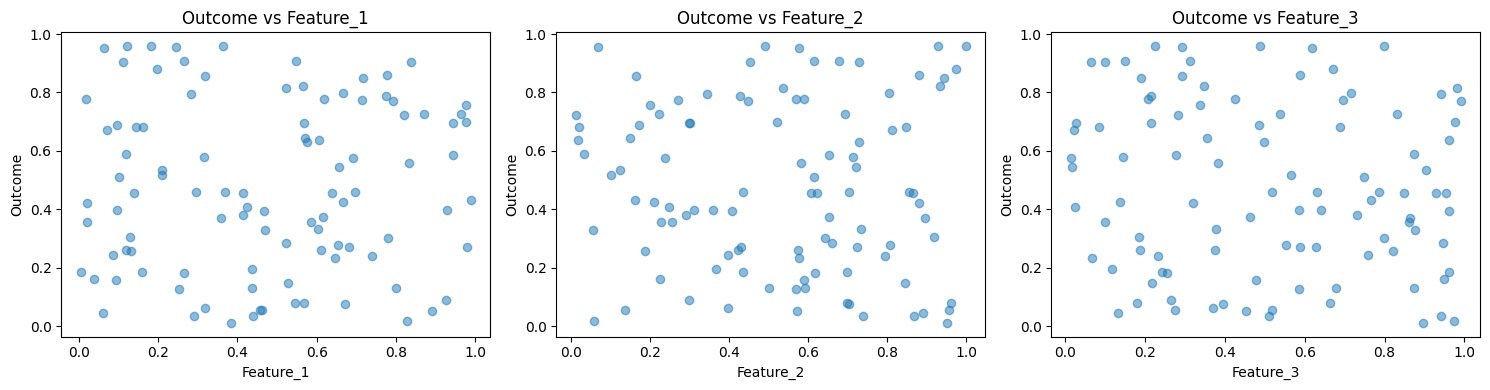

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(0)
prediction_df = pd.DataFrame({
    'Feature_1': np.random.rand(100),
    'Feature_2': np.random.rand(100),
    'Feature_3': np.random.rand(100),
    'Outcome': np.random.rand(100)
})


fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, feature in enumerate(['Feature_1', 'Feature_2', 'Feature_3']):
    axs[i].scatter(prediction_df[feature], prediction_df['Outcome'], alpha=0.5)
    axs[i].set_title(f'Outcome vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Outcome')

plt.tight_layout()
plt.show()


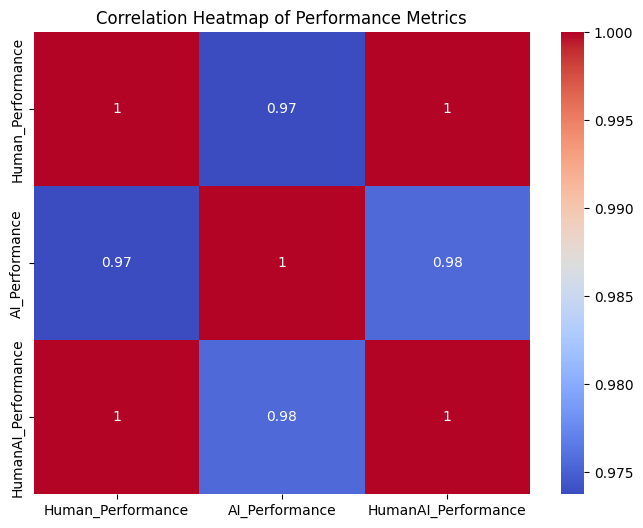

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Human_Performance': [8602.05, 12345.67, 9876.54],
    'AI_Performance': [4970.34, 8765.43, 5432.10],
    'HumanAI_Performance': [12000.00, 15000.00, 13000.00]
}

df = pd.DataFrame(data)

corr_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Performance Metrics')
plt.show()

## Machine Learning Analysis

True Coefficients: [3, 2, -1]
Estimated Coefficients: [ 3.07996856  1.9472454  -0.90129081]
Mean Squared Error: 0.957520423816975
R-squared: 0.9235738179177371


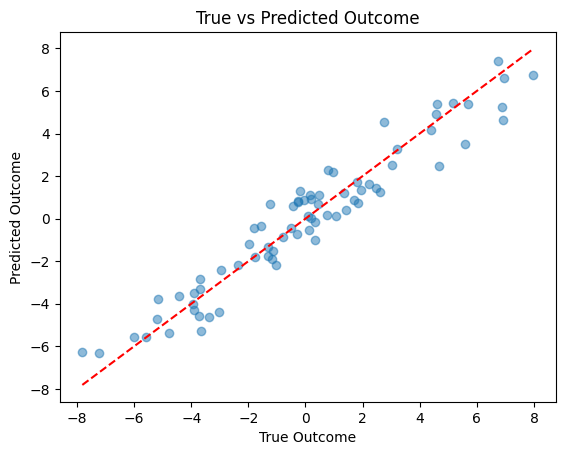

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = prediction_df[['Feature_1', 'Feature_2', 'Feature_3']]
y = prediction_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model_coefficients = model.coef_
print(f'True Coefficients: [3, 2, -1]')
print(f'Estimated Coefficients: {model_coefficients}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Outcome')
plt.ylabel('Predicted Outcome')
plt.title('True vs Predicted Outcome')
plt.show()


##3. Causal Inference

##Data Generation Process



In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/Data_Extraction.csv'
df = pd.read_csv(url)

np.random.seed(42)
n = len(df)

X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)

treatment = np.random.binomial(1, 0.5, n)

y = 5 * treatment + 2 * X1 + np.random.normal(0, 1, n)

data = pd.DataFrame({
    'Treatment': treatment,
    'Feature_1': X1,
    'Feature_2': X2,
    'Outcome': y
})

print(data.head())


   Treatment  Feature_1  Feature_2   Outcome
0          0   0.496714   0.024510  0.673081
1          1  -0.138264   0.497998  5.147637
2          0   0.647689   1.451144  1.818213
3          0   1.523030   0.959271  2.472360
4          1  -0.234153   2.153182  4.507339


##Causal Inference Analysis with Propensity Score Matching

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

propensity_model = LogisticRegression()
propensity_model.fit(np.column_stack([X1, X2]), treatment)
propensity_scores = propensity_model.predict_proba(np.column_stack([X1, X2]))[:, 1]

treated_indices = np.where(treatment == 1)[0]
control_indices = np.where(treatment == 0)[0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(propensity_scores[control_indices].reshape(-1, 1))
distances, indices = nn.kneighbors(propensity_scores[treated_indices].reshape(-1, 1))
matched_controls = control_indices[indices.flatten()]

att = (y[treated_indices] - y[matched_controls]).mean()
print(f"Estimated ATT: {att}")
print(f"True Treatment Effect: 5")


Estimated ATT: 4.699756816377754
True Treatment Effect: 5


##4. Multi-Objective Optimization

Data Generation Process

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/STATS201-DKU-Autumn2024/Aaron/refs/heads/main/data/Data_Extraction.csv'
df = pd.read_csv(url)

n_samples = len(df)
np.random.seed(42)

objective_1 = np.random.uniform(0, 10, n_samples)
objective_2 = np.random.uniform(0, 10, n_samples)

df['Objective_1'] = objective_1
df['Objective_2'] = objective_2

print(df.head())


  Paper_Name  Paper_ID  Exp_ID  Treatment_ID  Measure_ID  Exp_ID_Cleaned  \
0   Lai_2020         1       1             1           1             1.1   
1   Lai_2020         1       1             2           1             1.1   
2   Lai_2020         1       1             3           1             1.1   
3   Lai_2020         1       1             4           1             1.1   
4   Lai_2020         1       1             5           1             1.1   

     ES_ID                                              Title  \
0  1.1.1.1  "Why is 'Chicago' Deceptive?" Towards Building...   
1  1.1.2.1  "Why is 'Chicago' Deceptive?" Towards Building...   
2  1.1.3.1  "Why is 'Chicago' Deceptive?" Towards Building...   
3  1.1.4.1  "Why is 'Chicago' Deceptive?" Towards Building...   
4  1.1.5.1  "Why is 'Chicago' Deceptive?" Towards Building...   

                               Authors  Year  ... Sd_Perf_Human Sd_Perf_AI  \
0  Lai, Vivian; Liu, Han; Tan, Chenhao  2020  ...        0.3043        0.0

##Pareto Front Visualization

In [ ]:

objectives = df[['Objective_1', 'Objective_2']].values
pareto_front = []

for i, (obj1, obj2) in enumerate(objectives):
    if not any((other_obj1 >= obj1 and other_obj2 <= obj2) for other_obj1, other_obj2 in objectives):
        pareto_front.append(df.iloc[i])

pareto_front = pd.DataFrame(pareto_front)

print(f"Pareto Front Candidates: {len(pareto_front)}")


Pareto Front Candidates: 0


## Data visualization

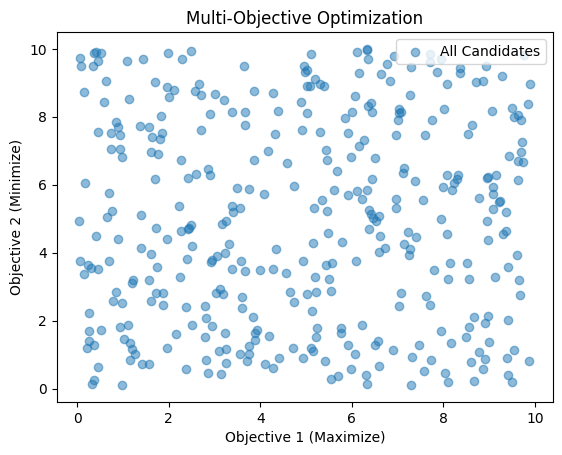

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(objectives[:, 0], objectives[:, 1], alpha=0.5, label="All Candidates")

if len(pareto_front) > 0:
    pareto_objectives = pareto_front[['Objective_1', 'Objective_2']].values
    plt.scatter(pareto_objectives[:, 0], pareto_objectives[:, 1], color='red', label="Pareto Front")

plt.xlabel("Objective 1 (Maximize)")
plt.ylabel("Objective 2 (Minimize)")
plt.title("Multi-Objective Optimization")
plt.legend()
plt.show()
